<a href="https://colab.research.google.com/github/KUMARPALAKOLLU/MultiClass_Data_Classification/blob/main/seed_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**P V S N S GANESH KUMAR**

**22MCB0036**

**Theory DA**

In [2]:
# Importing Required packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [3]:
# Creating a DataFrame with the dataset Using pandas library
seeds = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Analytics /seeds_dataset.csv')
seeds.head()

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [4]:
# No of rows and columns in the dataset
seeds.shape

(210, 8)

In [5]:
# Displaying a concise summary of a DataFrame
seeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area                     210 non-null    float64
 1   perimeter                210 non-null    float64
 2   compactness              210 non-null    float64
 3   length_of_kernel         210 non-null    float64
 4   width_of_kernel          210 non-null    float64
 5   asymmetry_coefficient    210 non-null    float64
 6   length_of_kernel_groove  210 non-null    float64
 7   type                     210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [6]:
# Descriptive statistics of a DataFrame
seeds.describe()

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,type
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


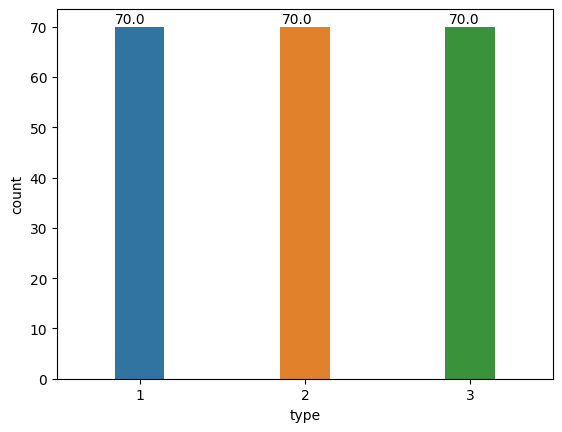

In [7]:
# No of observations for each type of seed
ax = sns.countplot(x='type', data=seeds,width=0.3)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.01))

plt.show()


# **Data Pre-Processing**

Data preprocessing, a component of data preparation, describes any type of processing performed on raw data to prepare it for another data processing procedure. It has traditionally been an important preliminary step for the data mining process. More recently, data preprocessing techniques have been adapted for training machine learning models and AI models and for running inferences against them.

Data preprocessing transforms the data into a format that is more easily and effectively processed in data mining, machine learning and other data science tasks. The techniques are generally used at the earliest stages of the machine learning and AI development pipeline to ensure accurate results.

**It Includes the following::**

**Data Cleaning:**

1. Handling Missing Values: Identify and handle missing values in the dataset.
2. Handling Duplicate Values: Identify and handle duplicate values in the dataset.
3. Handling Outliers: Detect and handle outliers, if present in the data.
4. Handling inconsistent data:Inconsistent data refers to data that is erroneous, incomplete, or contains discrepancies or contradictions

**Data Transformation:** 

Performing necessary transformations, such as scaling or normalization, to ensure data consistency.

**Encoding Categorical Variables:** 

Convert categorical labels into numeric values for multi-class classification.


**Feature Selection:**

1. Identify Relevant Features: Analyze the features and select the most relevant ones for the classification task.
2. Feature Extraction: Apply techniques like ANOVA or RFE to extract important features from the dataset.
Data Encoding:



# **Data Cleaning**

**Data cleaning Typically Includes**



**1. Handling missing values**

In [8]:
print(seeds.isnull().sum())
seeds.shape
# The shape before and after droping Null values is same that implies there are no null values in the dataframe 


area                       0
perimeter                  0
compactness                0
length_of_kernel           0
width_of_kernel            0
asymmetry_coefficient      0
length_of_kernel_groove    0
type                       0
dtype: int64


(210, 8)

**2. Removing duplicates**

In [ ]:
print(len(seeds[seeds.duplicated()]))
seeds.drop_duplicates(inplace=True) #if duplicates are there they will be removed
seeds.shape

# The shape before and after droping duplicates values is same that implies there are no duplicate values in the dataframe 


0


(210, 8)

**3. Handling outliers**

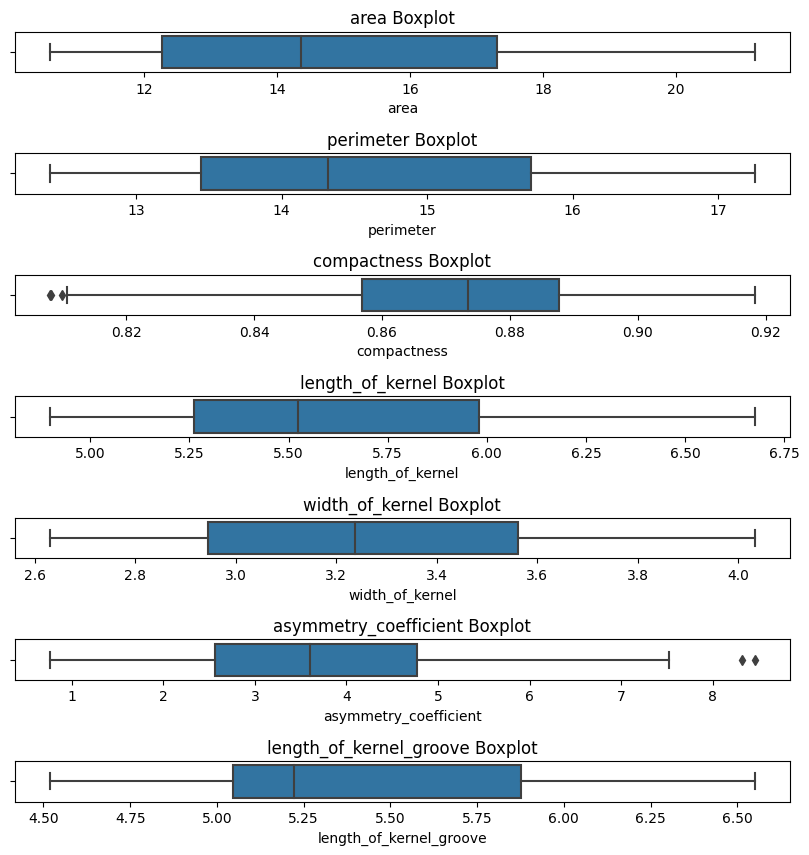

In [ ]:
# Finding the outliers using the boxplot
fig, axes = plt.subplots(len(seeds.columns[:-1]), figsize=(10, 10))
fig.subplots_adjust(hspace=2)
i=0
for feature in seeds.columns[:-1]:  # Exclude the last column
    sns.boxplot(x=seeds[feature], ax=axes[i])
    axes[i].set_title(f'{feature} Boxplot')
    i+=1


In [ ]:
# We can see that there are Outliers in the compactness and asymmetry_coefficient features so we try to fix that using Winsorization(setting limits) method

percentiles = seeds['compactness'].quantile([0.05,0.95]).values
seeds['compactness'][seeds['compactness'] <= percentiles[0]] = percentiles[0]
seeds['compactness'][seeds['compactness'] >= percentiles[1]] = percentiles[1]

percentiles = seeds['asymmetry_coefficient'].quantile([0.01,0.99]).values
seeds['asymmetry_coefficient'][seeds['asymmetry_coefficient'] <= percentiles[0]] = percentiles[0]
seeds['asymmetry_coefficient'][seeds['asymmetry_coefficient'] >= percentiles[1]] = percentiles[1]

<ipython-input-10-b8feb29575b6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seeds['compactness'][seeds['compactness'] <= percentiles[0]] = percentiles[0]
<ipython-input-10-b8feb29575b6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seeds['compactness'][seeds['compactness'] >= percentiles[1]] = percentiles[1]
<ipython-input-10-b8feb29575b6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seeds['asymmetry_coefficient'][seeds['as

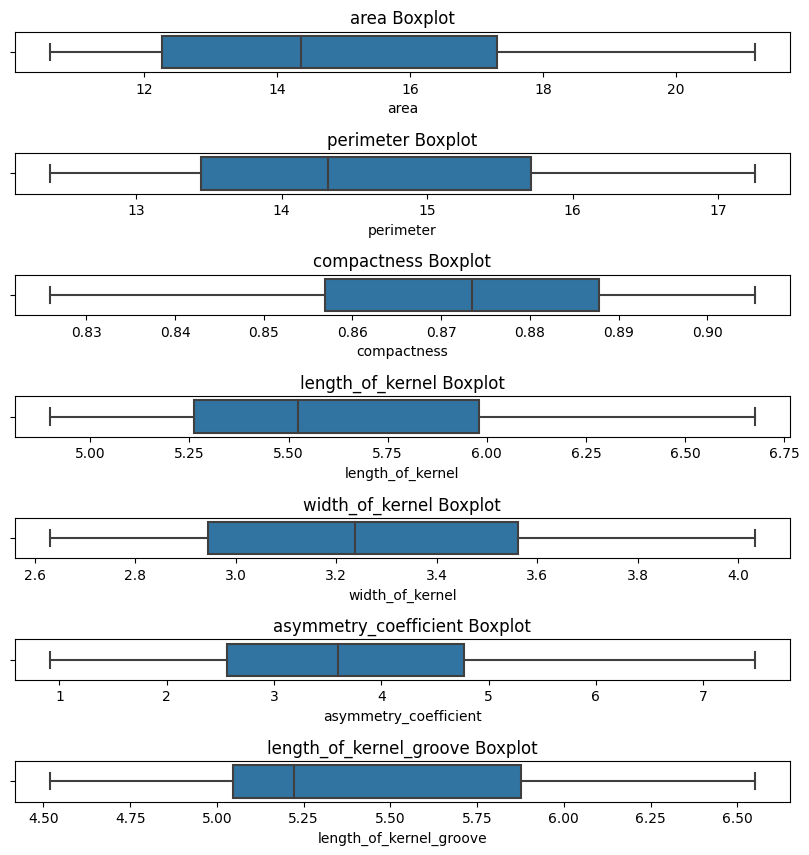

In [ ]:
# In this we can see that there are no outliers
fig, axes = plt.subplots(len(seeds.columns[:-1]), figsize=(10, 10))
fig.subplots_adjust(hspace=2)
i=0
for feature in seeds.columns[:-1]:  # Exclude the last column
    sns.boxplot(x=seeds[feature], ax=axes[i])
    axes[i].set_title(f'{feature} Boxplot')
    i+=1


**4. Handling inconsistent data**

Not required here but in general assume the column 'type' has inconsistent values 'kama', 'KAMA', 'k', 'ROSA', 'rosa','R'etc...

Handling inconsistent data in a column 'type' includes

=> Convert all values to lowercase for consistency

seeds['type'] = seeds['type'].str.lower()

=> Map inconsistent values to a standardized format

seeds['type'] = seeds['type'].map({'r': 'rosa', 'k': 'kama', 'c': 'canadian'})


# **Data Transformation**

**1. Data type conversion**

Not needed in this case but the syntax is 

data['type'] = data['type'].astype('category')

**2. Standardizing and scaling**

In [ ]:
# Not Necessary if we use Decision Tree as a model 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_seeds=seeds.copy()
standardized_seeds[seeds.columns[:-1]] = scaler.fit_transform(seeds[seeds.columns[:-1]])

standardized_seeds.head()


,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,type
0,0.142098,0.215462,-0.011866,0.304218,0.141702,-0.999004,-0.383577,1
1,0.011188,0.008224,0.443281,-0.168625,0.197432,-1.815778,-0.922013,1
2,-0.192067,-0.360201,1.520311,-0.763637,0.208048,-0.674467,-1.189192,1
3,-0.347091,-0.475333,1.092203,-0.688978,0.319508,-0.973204,-1.229983,1
4,0.445257,0.330595,1.448209,0.066666,0.805159,-1.586973,-0.475356,1


**Encoding Categorical Variables:**

Not needed in this case but the syntax is (if in type feature it was Kama, Rosa and Canadian instead of 1,2,3 we use it)

data = pd.get_dummies(data, columns=['type'])

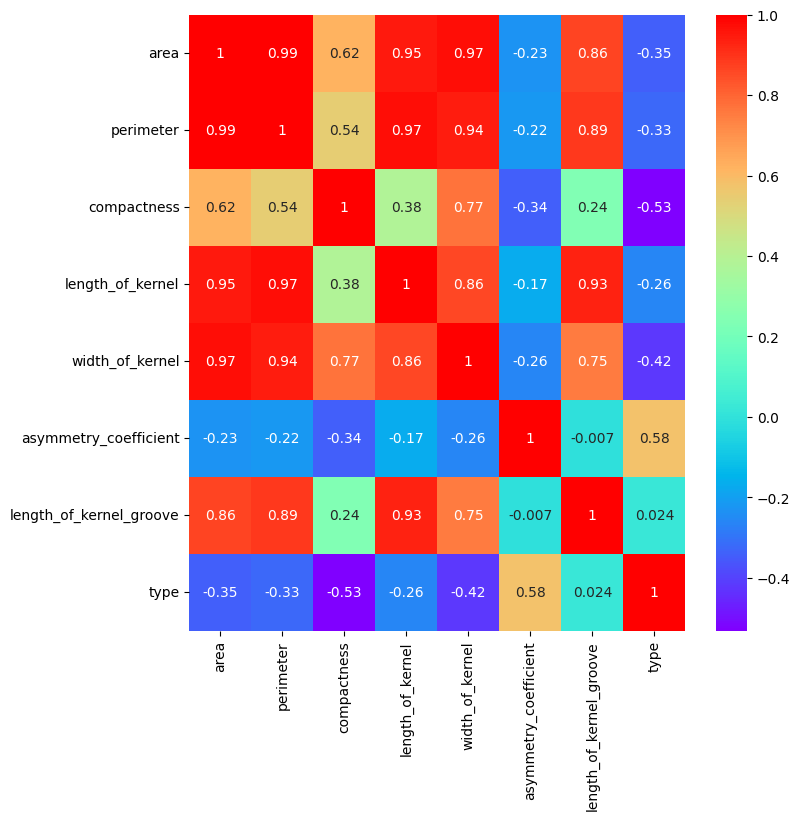

In [ ]:
# Seeing the Correlation of the features using Heatmap
plt.figure(figsize = (8,8))
sns.heatmap(seeds.corr(), annot = True, cmap="rainbow")
plt.show()

<Figure size 600x600 with 0 Axes>

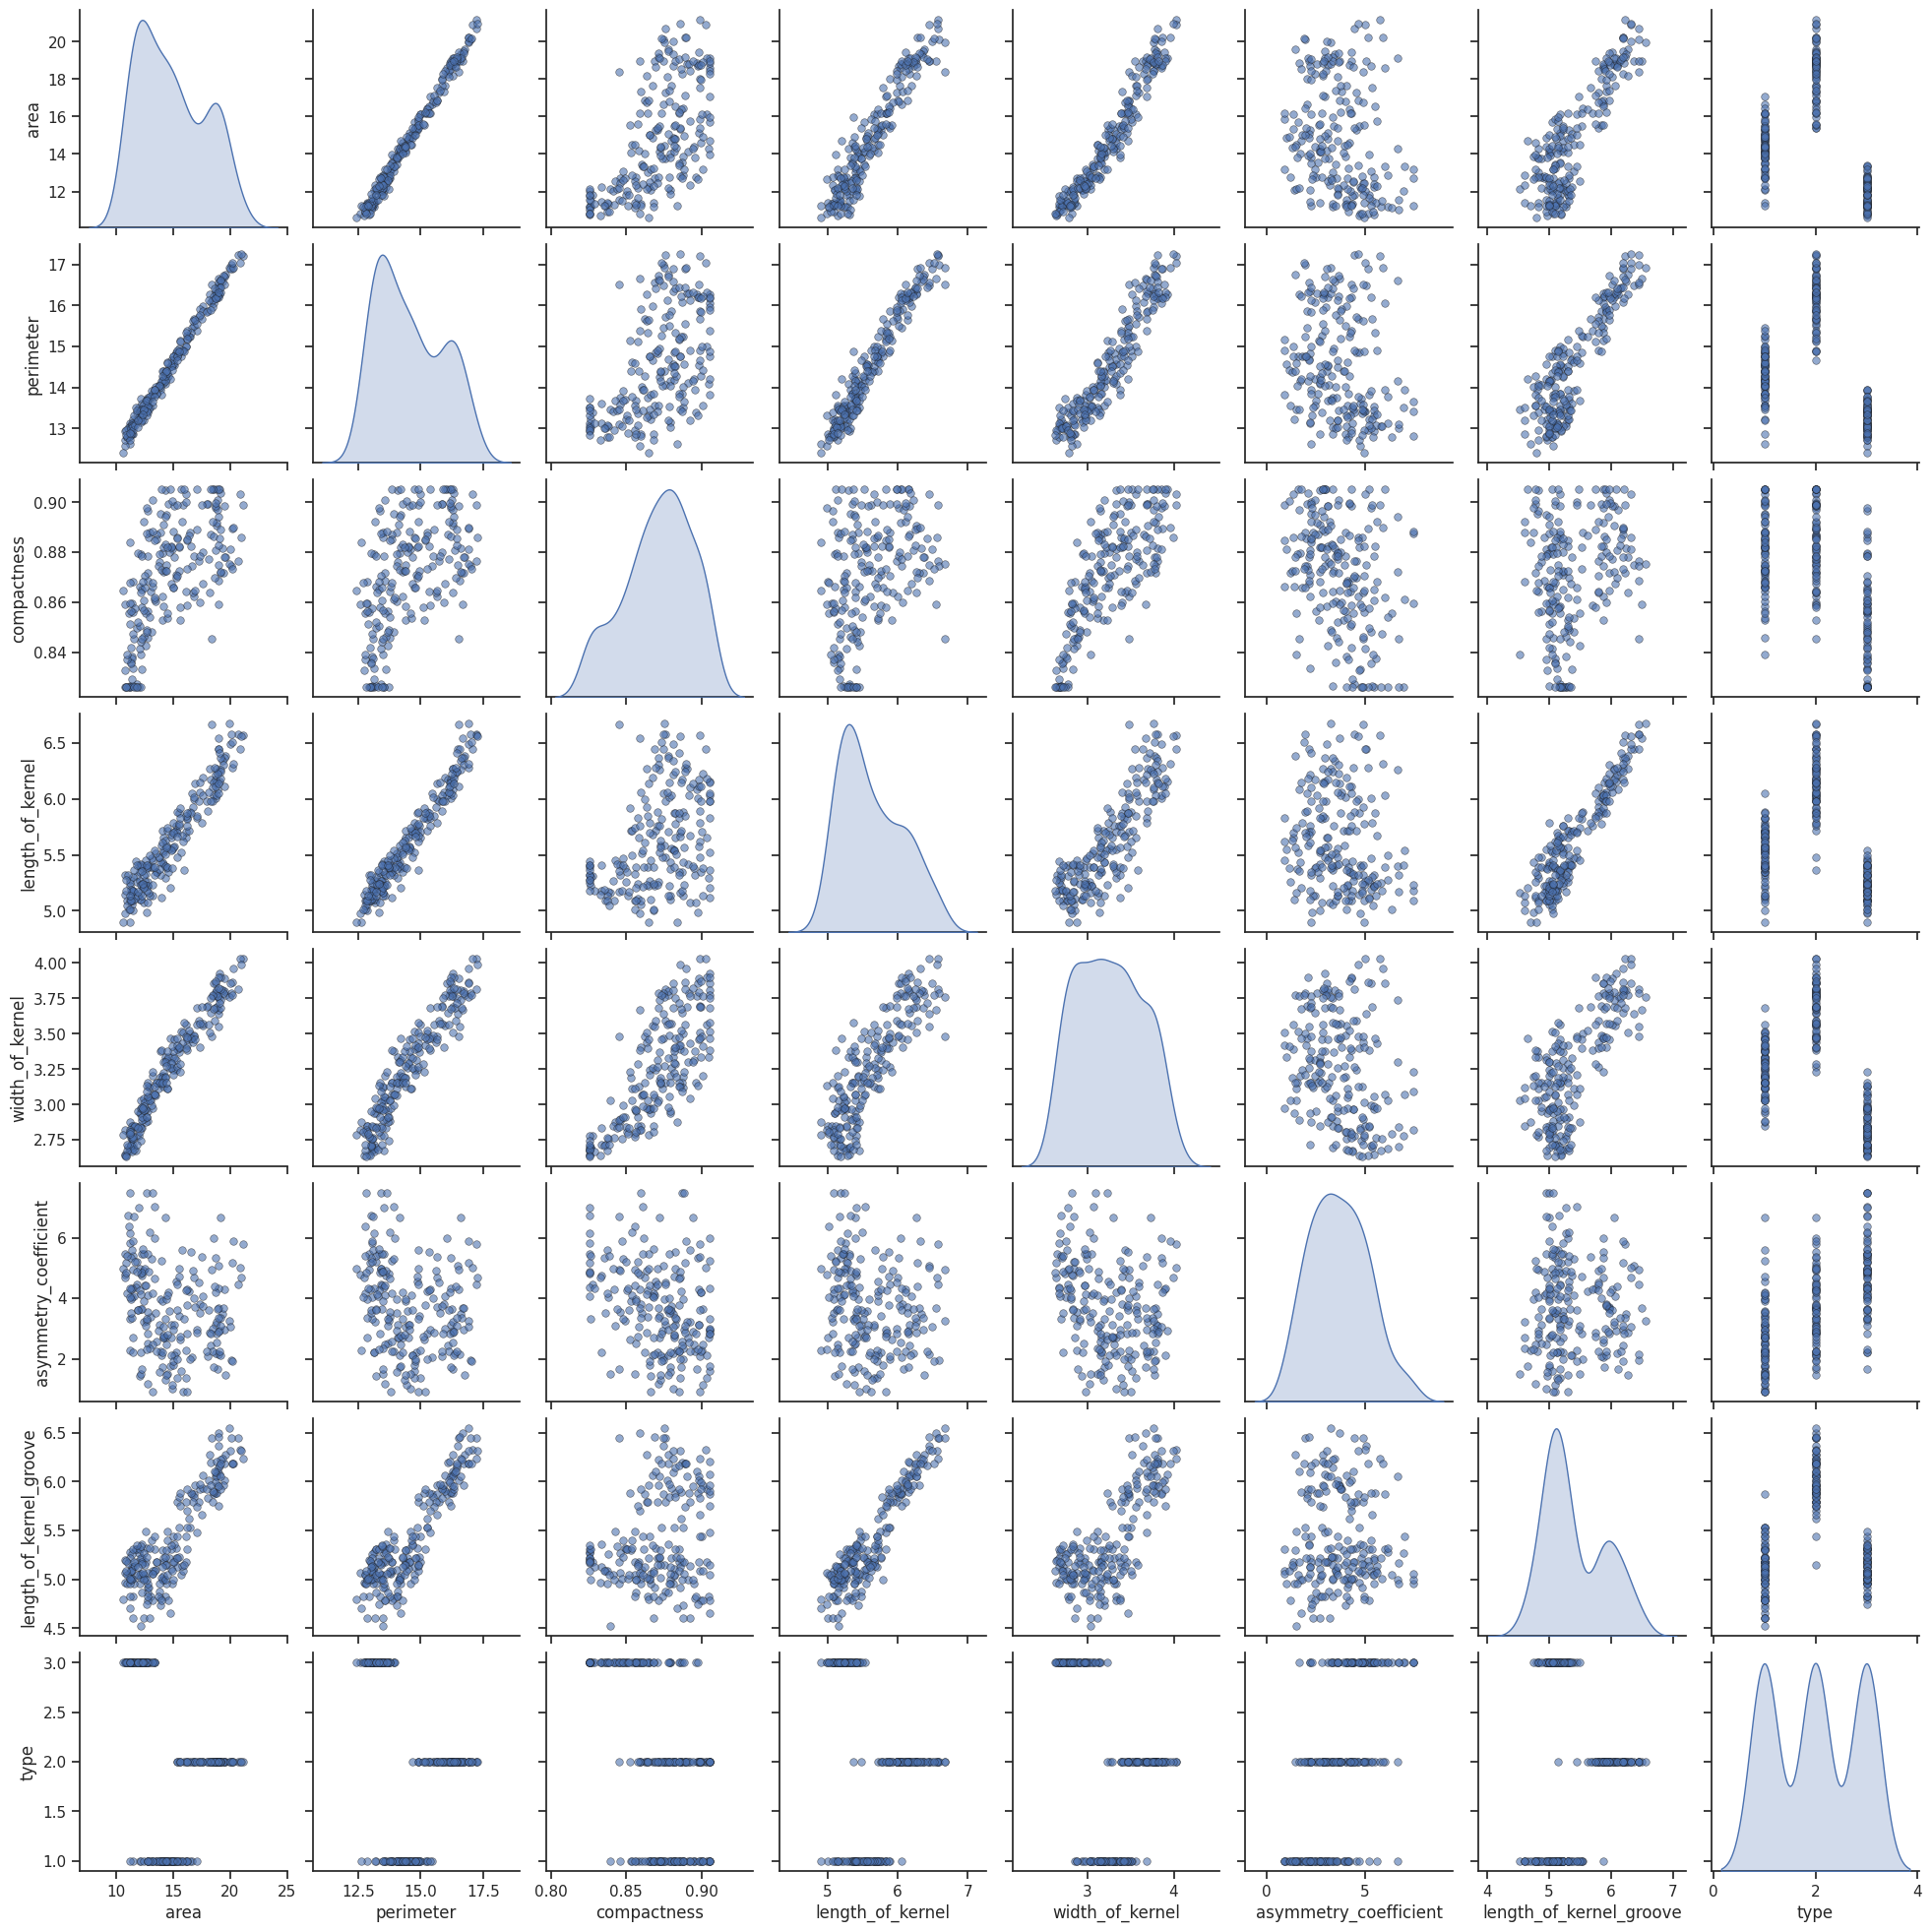

In [ ]:
# Seeing the Correlation of the features using SPLOM
plt.figure(figsize=(6,6))
sns.set(style="ticks")
sns.pairplot(seeds, diag_kind="kde", plot_kws={"alpha": 0.6, "s": 30, "edgecolor": "k"})
plt.show()

# **Feature Selection** 

**There are many methods such as chi-square, ANOVA, etc..  here we use ANOVA Fetaure selection technique**

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
X = seeds.drop('type', axis=1)
y = seeds['type']

# Applying feature selection
selector = SelectKBest(score_func=f_classif, k=3)
X_new = selector.fit_transform(X, y)
selected_features_ANOVA = X.columns[selector.get_support()]
print("Selected Features:",selected_features_ANOVA.values)


Selected Features: ['area' 'perimeter' 'width_of_kernel']


# **Feature Elimination**

**Here We use Recursive Feature Elimination (RFE)**

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
X = seeds.drop('type', axis=1)
y = seeds['type']

# Create the RFE object and specify the model
rfe = RFE(DecisionTreeClassifier(random_state=42), n_features_to_select=3)
X_rfe = rfe.fit_transform(X, y)
selected_features_RFE = X.columns[rfe.get_support()]

print("Selected Features:",selected_features_RFE.values)

Selected Features: ['area' 'asymmetry_coefficient' 'length_of_kernel_groove']


# **Root node Selection**

**Can be done for Random Forest,Decision Tree,Gradient Boosting,etc. Here we use Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
X = seeds.drop('type', axis=1)
y = seeds['type']

# Create the decision tree classifier object
clf = DecisionTreeClassifier(criterion='gini', random_state=10)
clf.fit(X, y)
feature_importances = clf.feature_importances_

features = {}
for feature, importance in zip(X.columns, feature_importances):
    features[feature]=importance
    print(f"{feature}: {importance}")



features = dict(sorted(features.items(), key=lambda x: -x[1]))
print(f'\n The Root Node for the Tree will be {next(iter(features))} with gain of {features[next(iter(features))]}.')

area: 0.3605064151484395
perimeter: 0.014285714285714285
compactness: 0.0
length_of_kernel: 0.012244897959183676
width_of_kernel: 0.024002131953259783
asymmetry_coefficient: 0.05540910876110955
length_of_kernel_groove: 0.5335517318922932

 The Root Node for the Tree will be length_of_kernel_groove with gain of 0.5335517318922932.


# **Model Building**

In [ ]:
from sklearn.model_selection import train_test_split
X = seeds.iloc[:,:-1]
y = seeds.iloc[:,-1]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train[:10].to_string())
print(y_train[:10].to_string())

      area  perimeter  compactness  length_of_kernel  width_of_kernel  asymmetry_coefficient  length_of_kernel_groove
150  11.83      13.23       0.8496             5.263            2.840                  5.195                    5.307
96   19.31      16.59       0.8815             6.341            3.810                  3.477                    6.238
200  12.38      13.44       0.8609             5.219            2.989                  5.472                    5.045
68   14.37      14.39       0.8726             5.569            3.153                  1.464                    5.300
156  11.34      12.87       0.8596             5.053            2.849                  3.347                    5.003
86   18.88      16.26       0.8969             6.084            3.764                  1.649                    6.109
100  16.41      15.25       0.8866             5.718            3.525                  4.217                    5.618
38   14.80      14.52       0.8823             5.656    

In [ ]:
# Training the Decision Tree Classification model on the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
Anova_feature_classifier = DecisionTreeClassifier()
RFE_feature_classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Training the Decision Tree Classification model on the feature selected by ANOVA 
selected_columns_ANOVA = list(selected_features_ANOVA.values)
df_selected_ANOVA_train = X_train[selected_columns_ANOVA]
df_selected_ANOVA_test = X_test[selected_columns_ANOVA]
Anova_feature_classifier.fit(df_selected_ANOVA_train,y_train)

DecisionTreeClassifier()

In [ ]:
# Training the Decision Tree Classification model on the feature selected by RFE 
selected_columns_RFE = list(selected_features_RFE)
df_selected_RFE_train = X_train[selected_columns_RFE]
df_selected_RFE_test = X_test[selected_columns_RFE]
RFE_feature_classifier.fit(df_selected_RFE_train,y_train)

DecisionTreeClassifier()

In [ ]:
# Storing the predicted labels
y_pred = classifier.predict(X_test)
y_pred_selected_ANOVA = Anova_feature_classifier.predict(df_selected_ANOVA_test)
y_pred_selected_RFE = RFE_feature_classifier.predict(df_selected_RFE_test)
y_true= y_test.values.tolist()

In [ ]:
# Getting the accuracy of each model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc,accuracy_score

accuracy = accuracy_score(y_true, y_pred)
accuracy_selected_ANOVA = accuracy_score(y_true, y_pred_selected_ANOVA)
accuracy_selected_RFE = accuracy_score(y_true, y_pred_selected_RFE)
from tabulate import tabulate

scores_table = [
    ['All Features', accuracy*100],
    ['Selected (ANOVA)', accuracy_selected_ANOVA*100],
    ['Selected (RFE)', accuracy_selected_RFE*100]
]

headers = ['Feature Selection Technique', 'Accuracy Score']

print(tabulate(scores_table, headers=headers, tablefmt='grid'))


+-------------------------------+------------------+
| Feature Selection Technique   |   Accuracy Score |
+===============================+==================+
| All Features                  |          83.3333 |
+-------------------------------+------------------+
| Selected (ANOVA)              |          78.5714 |
+-------------------------------+------------------+
| Selected (RFE)                |          95.2381 |
+-------------------------------+------------------+


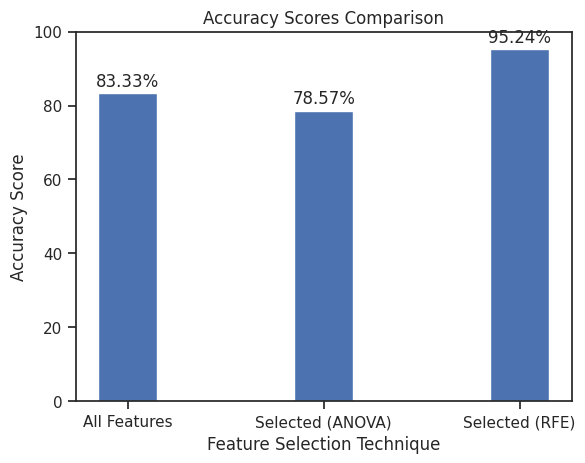

In [ ]:
# Visulaizing the accuracy's
accuracy_scores = [accuracy*100, accuracy_selected_ANOVA*100, accuracy_selected_RFE*100]
labels = ['All Features', 'Selected (ANOVA)', 'Selected (RFE)']

plt.bar(labels, accuracy_scores, width=0.3)
plt.xlabel('Feature Selection Technique')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores Comparison')
plt.ylim([0, 100])
for i, score in enumerate(accuracy_scores):
    plt.text(i, score + 2, f'{score:.2f}%', ha='center')

plt.show()


**Taking the model with high accuracy**

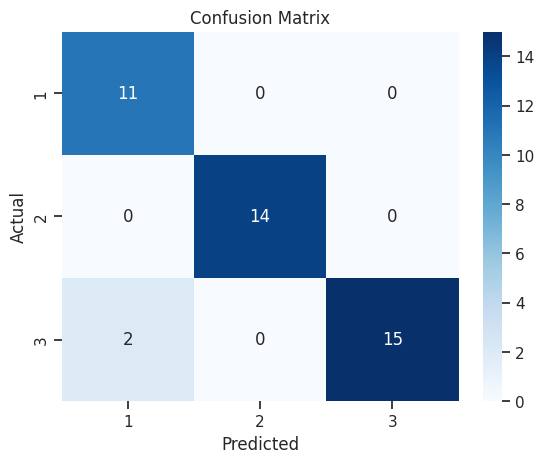

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred_selected_RFE)

# Ploting the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=seeds['type'].unique(), yticklabels=seeds['type'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

F1 Score : 0.952876984126984
Precision : 0.9597069597069596
Recall : 0.9523809523809523


<BarContainer object of 3 artists>

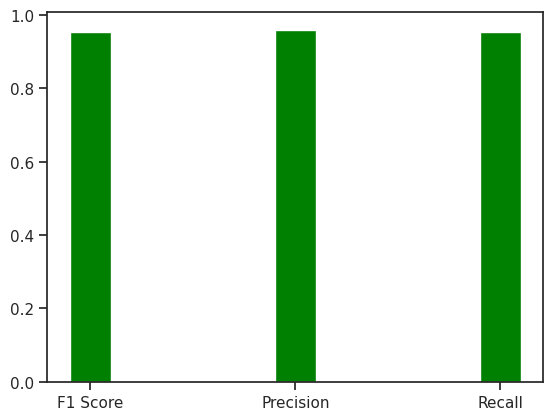

In [ ]:
# Calculating the F1, Precision, Recall
from sklearn.metrics import f1_score, precision_score, recall_score
F1_score = f1_score(y_true, y_pred_selected_RFE, average='weighted')
precision = precision_score(y_true, y_pred_selected_RFE, average='weighted')
recall = recall_score(y_true, y_pred_selected_RFE, average='weighted')

print("F1 Score :",F1_score)
print("Precision :",precision)
print("Recall :",recall)

plt.bar(['F1 Score','Precision','Recall'],[F1_score,precision,recall],width=0.2,color='green')

In [ ]:
# Compute precision, recall, and F1 score
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.73      0.70        11
           2       0.92      0.86      0.89        14
           3       0.88      0.88      0.88        17

    accuracy                           0.83        42
   macro avg       0.82      0.82      0.82        42
weighted avg       0.84      0.83      0.84        42



In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the true labels
y_true_binary = label_binarize(y_true, classes=np.unique(y_true))

# Predict probabilities for the test set
y_score = RFE_feature_classifier.predict_proba(df_selected_RFE_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = y_true_binary.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_binary[:, i], y_score[:, i])
    formatted_fpr = "{:.2f}".format(fpr[i][1])
    formatted_tpr = "{:.2f}".format(tpr[i][1])
    print(f"(FPR,TPR) for Type {i+1} =",(formatted_fpr,formatted_tpr),sep='\t')
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_binary.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
formatted_fpr = "{:.2f}".format(fpr["micro"][1])
formatted_tpr = "{:.2f}".format(tpr["micro"][1])
print(f"(FPR,TPR) for model  =",(formatted_fpr,formatted_tpr),sep='\t')

(FPR,TPR) for Type 1 =	('0.06', '1.00')
(FPR,TPR) for Type 2 =	('0.00', '1.00')
(FPR,TPR) for Type 3 =	('0.00', '0.88')
(FPR,TPR) for model  =	('0.02', '0.95')


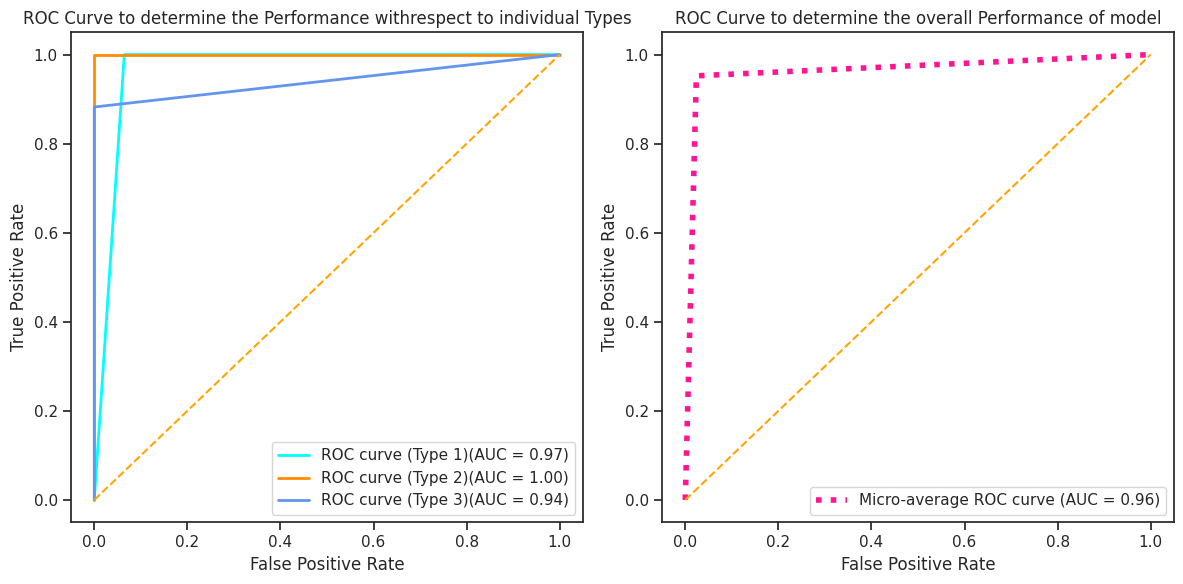

In [ ]:
# Visualizing the ROC Curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot ROC curve for each class
colors = ["aqua", "darkorange", "cornflowerblue"] 
for i, color in zip(range(n_classes), colors):
    ax1.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (Type {i+1})'+'(AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))
ax1.plot([0, 1], [0, 1], color='orange', linestyle='--')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curve to determine the Performance withrespect to individual Types')
ax1.legend(loc="lower right")

# Plot micro-average ROC curve
ax2.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', lw=4,
         label='Micro-average ROC curve (AUC = {0:0.2f})'
         ''.format(roc_auc["micro"]))
ax2.plot([0, 1], [0, 1], color='orange', linestyle='--')
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve to determine the overall Performance of model')
ax2.legend(loc="lower right")

plt.tight_layout()
plt.show()


In [ ]:
# Predicting the type for newly coming data
print("Enter the feature values in the order as shown below!\n")
print(*seeds.columns[:-1].values)
newTest = list(map(float, input().split()))
df = pd.DataFrame([newTest], columns=seeds.columns[:-1])
df_selected = df[selected_columns_RFE]
label = list(RFE_feature_classifier.predict(df_selected))
print(f"\n\nIt is of type {label.pop()}")

print("\nNote:")
print("Type 1 - Kama")
print("Type 2 - Rosa")
print("Type 3 - Canadian")

Enter the feature values in the order as shown below!

area perimeter compactness length_of_kernel width_of_kernel asymmetry_coefficient length_of_kernel_groove
10.74	12.73	0.8329	5.145	2.642	4.702	4.963


It is of type 3

Note:
Type 1 - Kama
Type 2 - Rosa
Type 3 - Canadian
